# RNN Air Passengers Data

In [ ]:
Dataset is airpassengers from keggle

In [37]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
ap = pd.read_csv('AirPassengers.csv', usecols=[1], engine='python')
print(ap)

     #Passengers
0            112
1            118
2            132
3            129
4            121
..           ...
139          606
140          508
141          461
142          390
143          432

[144 rows x 1 columns]


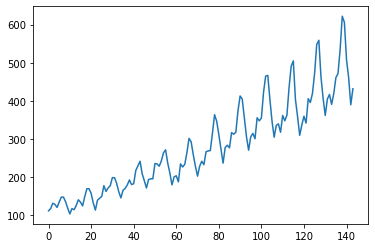

In [39]:
plt.plot(ap)
plt.show()

In [40]:
# load the dataset

data = ap.values
data = data.astype('float32')

In [41]:
# split into train and test sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]
print(len(train), len(test))

96 48


In [42]:
# convert an array of values into a dataset matrix
def create_data(data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i + look_back, 0])
        return np.array(dataX), np.array(dataY)

In [43]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_data(train, look_back)
testX, testY = create_data(test, look_back)

In [44]:
model = Sequential()
model.add(Dense(8, input_shape=(look_back,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(trainX, trainY, epochs=50, batch_size=2, verbose=2)

Epoch 1/50
1/1 - 0s - loss: 15326.9473 - 251ms/epoch - 251ms/step
Epoch 2/50
1/1 - 0s - loss: 13345.7842 - 2ms/epoch - 2ms/step
Epoch 3/50
1/1 - 0s - loss: 12817.2920 - 2ms/epoch - 2ms/step
Epoch 4/50
1/1 - 0s - loss: 12309.7275 - 2ms/epoch - 2ms/step
Epoch 5/50
1/1 - 0s - loss: 11822.2617 - 2ms/epoch - 2ms/step
Epoch 6/50
1/1 - 0s - loss: 11354.0996 - 2ms/epoch - 2ms/step
Epoch 7/50
1/1 - 0s - loss: 10904.4775 - 3ms/epoch - 3ms/step
Epoch 8/50
1/1 - 0s - loss: 10472.6611 - 8ms/epoch - 8ms/step
Epoch 9/50
1/1 - 0s - loss: 10057.9434 - 2ms/epoch - 2ms/step
Epoch 10/50
1/1 - 0s - loss: 9659.6484 - 3ms/epoch - 3ms/step
Epoch 11/50
1/1 - 0s - loss: 9277.1260 - 5ms/epoch - 5ms/step
Epoch 12/50
1/1 - 0s - loss: 8909.7529 - 3ms/epoch - 3ms/step
Epoch 13/50
1/1 - 0s - loss: 8556.9258 - 2ms/epoch - 2ms/step
Epoch 14/50
1/1 - 0s - loss: 8218.0713 - 4ms/epoch - 4ms/step
Epoch 15/50
1/1 - 0s - loss: 7892.6372 - 3ms/epoch - 3ms/step
Epoch 16/50
1/1 - 0s - loss: 7580.0889 - 3ms/epoch - 3ms/step
Epoc

In [45]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_shape=(look_back,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 8173.1797 - 384ms/epoch - 384ms/step
Epoch 2/100
1/1 - 0s - loss: 8102.2290 - 3ms/epoch - 3ms/step
Epoch 3/100
1/1 - 0s - loss: 8031.4727 - 2ms/epoch - 2ms/step
Epoch 4/100
1/1 - 0s - loss: 7960.9126 - 3ms/epoch - 3ms/step
Epoch 5/100
1/1 - 0s - loss: 7890.5576 - 2ms/epoch - 2ms/step
Epoch 6/100
1/1 - 0s - loss: 7820.4116 - 3ms/epoch - 3ms/step
Epoch 7/100
1/1 - 0s - loss: 7750.4790 - 4ms/epoch - 4ms/step
Epoch 8/100
1/1 - 0s - loss: 7680.7642 - 3ms/epoch - 3ms/step
Epoch 9/100
1/1 - 0s - loss: 7611.2700 - 3ms/epoch - 3ms/step
Epoch 10/100
1/1 - 0s - loss: 7542.0024 - 2ms/epoch - 2ms/step
Epoch 11/100
1/1 - 0s - loss: 7472.9663 - 3ms/epoch - 3ms/step
Epoch 12/100
1/1 - 0s - loss: 7404.1646 - 4ms/epoch - 4ms/step
Epoch 13/100
1/1 - 0s - loss: 7335.6011 - 8ms/epoch - 8ms/step
Epoch 14/100
1/1 - 0s - loss: 7267.2803 - 2ms/epoch - 2ms/step
Epoch 15/100
1/1 - 0s - loss: 7199.2075 - 3ms/epoch - 3ms/step
Epoch 16/100
1/1 - 0s - loss: 7131.3833 - 0s/epoch - 0s/step

In [46]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 2533.56 MSE (50.33 RMSE)
Test Score: 12350.71 MSE (111.13 RMSE)


1/1 [==============================] - 0s 15ms/step


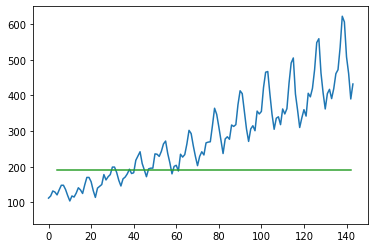

In [47]:

...
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict
# plot baseline and predictions
plt.plot(data)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()